In [1]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 7.3 MB/s eta 0:00:00


In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt
import shap
import warnings


from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [7]:
df = pd.read_csv('/content/gdrive/MyDrive/tidaldatathon/student_data.csv')



FileNotFoundError: ignored

In [ ]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,help
0,0,0,18,0,1,1,4,4,2,2,...,4,3,4,1,1,3,6,5,6,1
1,0,0,17,0,1,0,1,1,1,2,...,5,3,3,1,1,3,4,5,5,1
2,0,0,15,0,0,0,1,1,1,2,...,4,3,2,2,3,3,10,7,8,1
3,0,0,15,0,1,0,4,2,1,3,...,3,2,2,1,1,5,2,15,14,0
4,0,0,16,0,1,0,3,3,1,2,...,4,3,2,1,2,5,4,6,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,0,0,1,2,2,1,2,...,5,5,4,4,5,4,11,9,9,1
391,1,1,17,0,0,0,3,1,2,1,...,2,4,5,3,4,2,3,14,16,0
392,1,1,21,1,1,0,1,1,1,1,...,5,5,3,3,3,3,3,10,8,1
393,1,1,18,1,0,0,3,2,3,1,...,4,4,1,3,4,5,0,11,12,1


In [ ]:
#dealing with categorical features through encoding or by dropping non-important variables (deemed non-important through analyzing feature importance)

schooldict = {'GP': 0, 'MS': 1}
sexdict = {'F':0, 'M':1}
addressdict = {'U':0, 'R':1}
famsizedict = {'LE3': 0, 'GT3': 1}
pstatusdict = {'T': 0, 'A': 1}
yesnodict = {'yes': 0, 'no': 1}

for i in ['Mjob', 'Fjob', 'reason', 'guardian']:
  df = df.drop(i,axis=1)

for i in [schooldict,sexdict,addressdict,famsizedict,pstatusdict,yesnodict]:
  df = df.replace(i)


In [ ]:
df['help'] = np.where(df['G3'] >= 14, 0, 1)

In [ ]:
df = df.drop("G3", axis=1)

In [ ]:
y = df['help']

X = df.drop("help", axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model_gb = lgb.LGBMClassifier(boosting_type='gbdt')
model_gb.fit(X_train, y_train)

model_rf = lgb.LGBMClassifier(boosting_type='rf', bagging_fraction=0.8, feature_fraction=0.8)
model_rf.fit(X_train, y_train)

model_drt = lgb.LGBMClassifier(boosting_type='dart')
model_drt.fit(X_train, y_train)




In [ ]:
y_pred_gb = model_gb.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
y_pred_drt = model_drt.predict(X_test)


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


In [ ]:
accuracy_gb = accuracy_score(y_test, y_pred_gb)

conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
norm_conf_matrix_gb = confusion_matrix(y_test,y_pred_gb,normalize='true')

accuracy_gb

0.9620253164556962

In [ ]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
norm_conf_matrix_rf = confusion_matrix(y_test,y_pred_rf,normalize='true')

accuracy_rf

0.9367088607594937

In [ ]:
accuracy_drt = accuracy_score(y_test, y_pred_drt)

conf_matrix_drt = confusion_matrix(y_test, y_pred_drt)
norm_conf_matrix_drt = confusion_matrix(y_test,y_pred_drt,normalize='true')

accuracy_drt

0.9746835443037974

<function matplotlib.pyplot.show(close=None, block=None)>

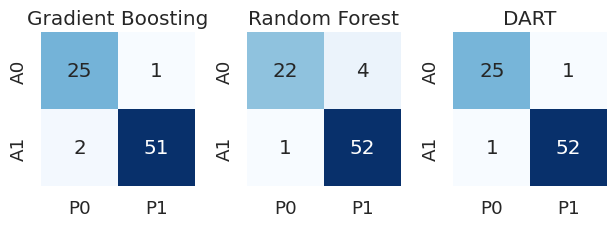

In [ ]:
sns.set(font_scale=1.2)

plt.subplot(1,3,1)

# Create a heatmap of the confusion matrix
sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
            xticklabels=["P0", "P1"],
            yticklabels=["A0", "A1"])

# Add labels and a title

plt.title('Gradient Boosting')

plt.subplot(1,3,2)

# Create a heatmap of the confusion matrix
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
            xticklabels=["P0", "P1"],
            yticklabels=["A0", "A1"])

# Add labels and a title

plt.title('Random Forest')

plt.subplot(1,3,3)

# Create a heatmap of the confusion matrix
sns.heatmap(conf_matrix_drt, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
            xticklabels=["P0", "P1"],
            yticklabels=["A0", "A1"])

# Add labels and a title

plt.title('DART')

plt.tight_layout()
plt.show

<Axes: title={'center': 'DART'}, xlabel='Feature importance', ylabel='Features'>

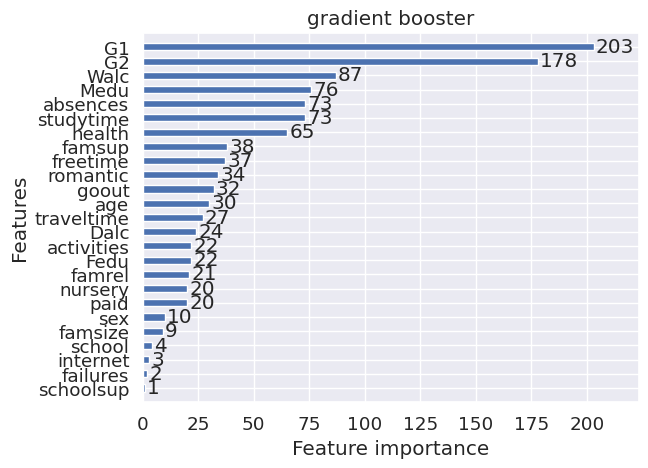

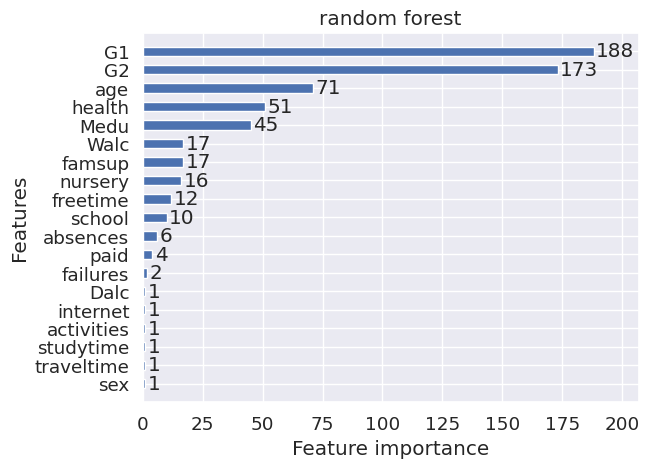

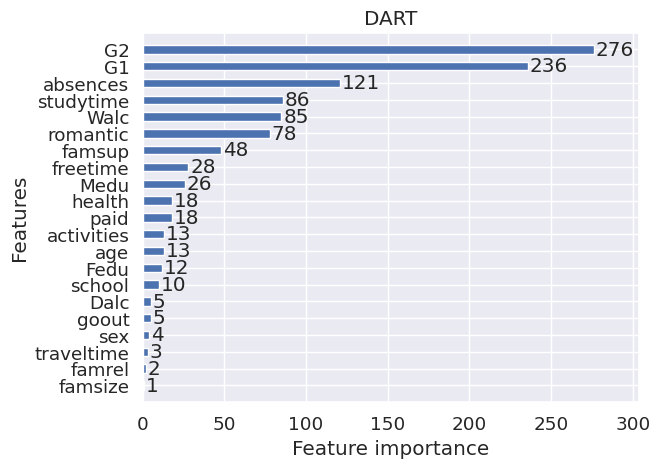

In [ ]:
lgb.plot_importance(model_gb, height = 0.5, title = "gradient booster")
lgb.plot_importance(model_rf, height = 0.5, title="random forest")
lgb.plot_importance(model_drt, height = 0.5, title='DART')

In [ ]:
explainer_new_gb = shap.Explainer(model_gb, X)
new_shap_values_gb = explainer_new_gb(X)



In [ ]:
explainer_new_rf = shap.Explainer(model_rf, X)
new_shap_values_rf = explainer_new_rf(X)

In [ ]:
explainer_new_drt = shap.Explainer(model_drt, X)
new_shap_values_drt = explainer_new_drt(X)

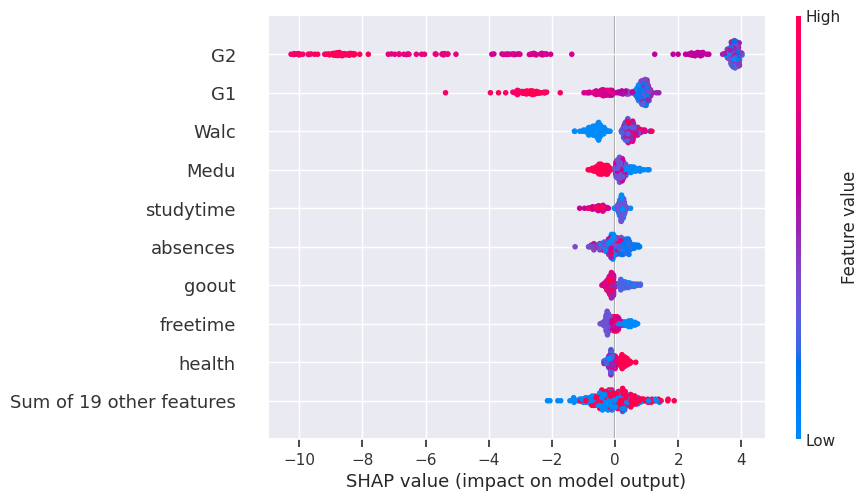

In [ ]:
shap.plots.beeswarm(new_shap_values_gb)

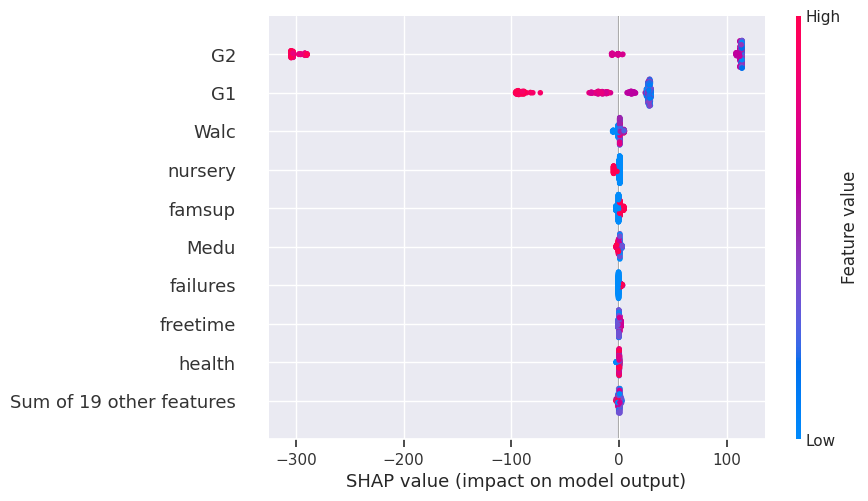

In [ ]:
shap.plots.beeswarm(new_shap_values_rf)

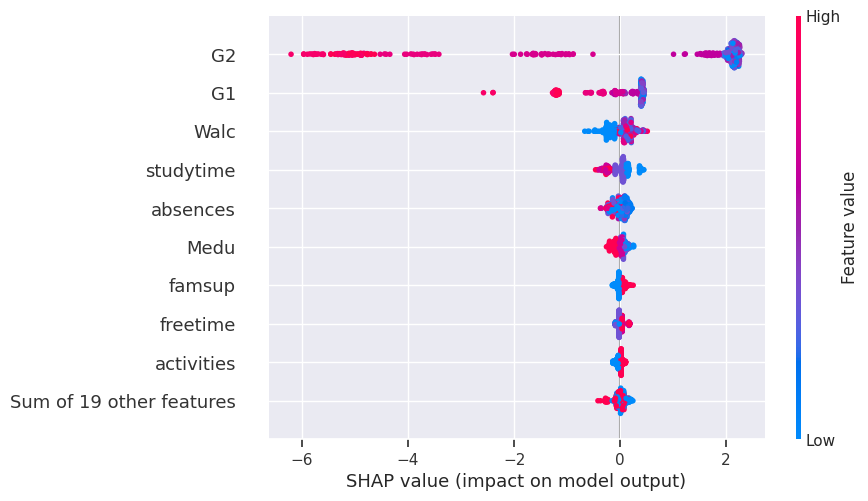

DART


In [ ]:
shap.plots.beeswarm(new_shap_values_drt)
print("DART")

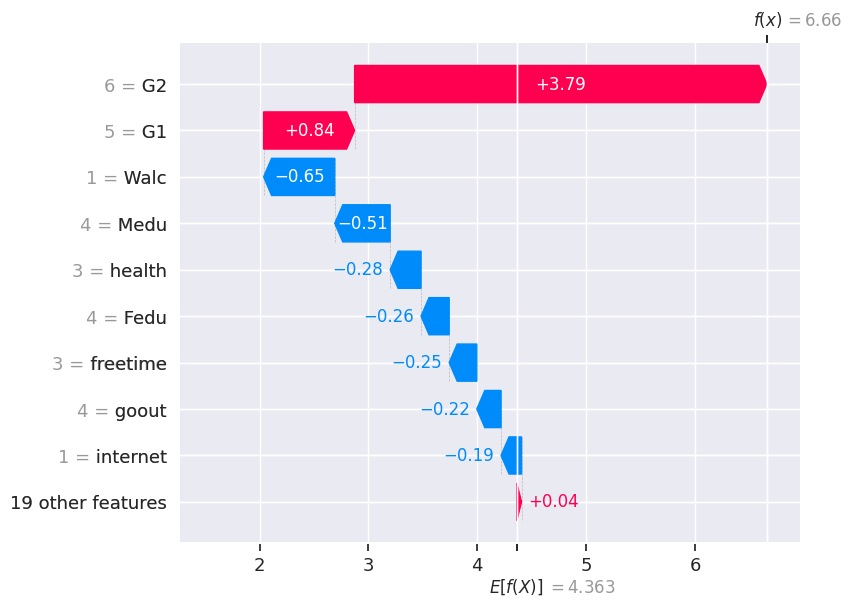

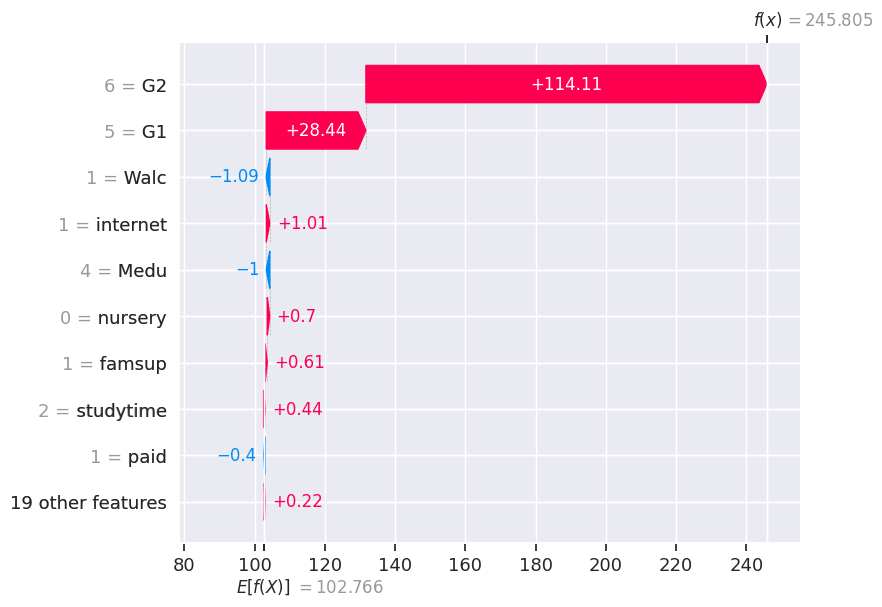

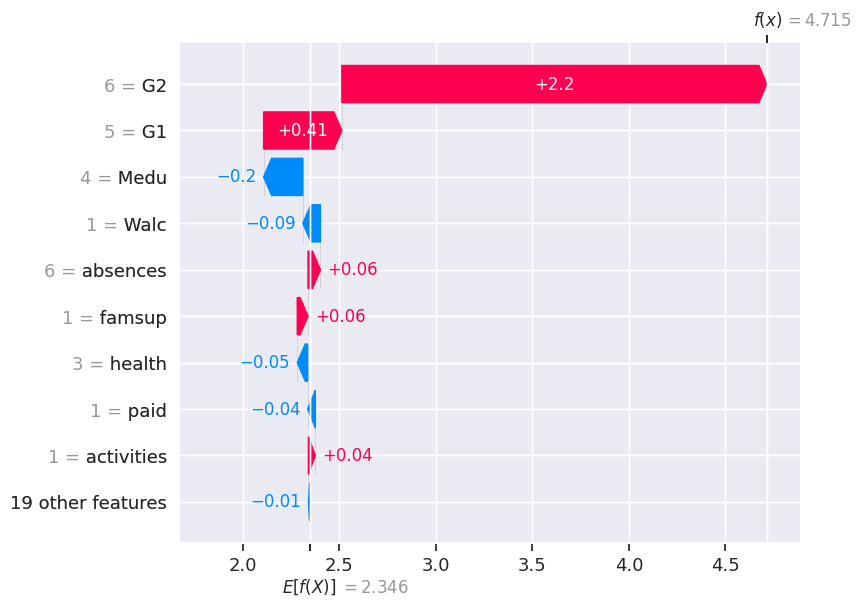

In [ ]:
shap.plots.waterfall(new_shap_values_gb[0])
shap.plots.waterfall(new_shap_values_rf[0])
shap.plots.waterfall(new_shap_values_drt[0])